# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Authors:** Claire Meyer, Nicolas Furrer, Philipp Schuler  
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [ ]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
#tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
#with tarfile.open(tar_path, mode='r:gz') as tar:
#    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

In [ ]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 as cv
import numpy as np

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()
print("Done")

### 1.2 Region growing
Add your implementation and discussion

Seed :  (150, 150)
Brain size :  16308  Pixels


(-0.5, 257.5, 257.5, -0.5)

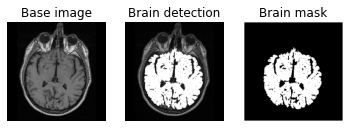

In [73]:
def region_growing_openCV(image, seed, low_threshold, high_threshold):
    mask = np.zeros((im_h+2,im_w+2),np.uint8)
    cv.floodFill(image, mask, seed, 255,low_threshold, high_threshold)
    return image, mask
    


brain_im_c = brain_im.copy()
seed = (150,150)
image, mask = region_growing_openCV(brain_im_c, seed, 6, 6)
mask_h, mask_w = mask.shape
count = 0
for x in range(mask_w):
    for y in range(mask_h):
        if mask[x,y]==1:
            count = count + 1


#Plot
print("Seed : " , seed)
print("Brain size : ", count, " Pixels")
ax = plt.subplot(1,3,1)
ax.set_title("Base image")
ax.imshow(brain_im, cmap='gray')
ax.axis('off')
ax = plt.subplot(1,3,2)
ax.set_title("Brain detection")
ax.imshow(image, cmap='gray')
ax.axis('off')
ax = plt.subplot(1,3,3,)
ax.set_title("Brain mask")
ax.imshow(mask, cmap ='gray')
ax.axis('off')


#### Discussion
Cest la la discussion

### 1.3 Contour detection
Add your implementation and discussion

In [ ]:
import numpy as np
import cv2 as cv

# Image in CV format
original_img = cv.imread(os.path.join(data_path, 'brain-slice40.tiff'),0)

# Canny detection 
kernel = np.zeros((3,3),np.uint8)
cv.circle(img=kernel, center=(1,1), radius=1, color=255, thickness=-1) 
edges_img = cv.Canny(image=original_img,threshold1=85,threshold2=200,apertureSize=3)
dilated_edges_img = cv.dilate(edges_img,kernel,iterations = 1)

# Flood-filling from pixel (0, 0)
h, w = edges_img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
flooded_img = dilated_edges_img.copy()
cv.floodFill(flooded_img, mask, (150,150), 255);

# Inversion of the flood filled image 
flooded_img = cv.bitwise_not(flooded_img)

# Combination of the thresholded image with the inverted flood filled image using bitwise OR operation 
dilated_segmented_img = cv.bitwise_or(dilated_edges_img,flooded_img)
segmented_img = cv.erode(dilated_segmented_img,kernel,iterations = 1)

# Number of pixels
n = np.sum(segmented_img == 255)
print(f"number of white pixels : {n}")
print(f"proportion with respect to image size : {n/(256*256)}")

# Save
#cv.imwrite(os.path.join(data_path, 'test_edges.png'), img=edges_img)
#cv.imwrite(os.path.join(data_path, 'test_edges1.png'), img=edges_img1)
#cv.imwrite(os.path.join(data_path, 'test_edges2.png'), img=edges_img2)
#cv.imwrite(os.path.join(data_path, 'test_edges3.png'), img=edges_img3)
#cv.imwrite(os.path.join(data_path, 'test_edges4.png'), img=edges_img4)
#cv.imwrite(os.path.join(data_path, 'test_edges5.png'), img=edges_img5)

# Plots
plt.subplot(231),plt.imshow(edges_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(dilated_edges_img,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(flooded_img,cmap = 'gray')
plt.title('Circle kernel'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(edges_img4,cmap = 'gray')
plt.title('Circle kernel'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(edges_img5,cmap = 'gray')
plt.title('Circle kernel'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(edges_img1,cmap = 'gray')
plt.title('Circle kernel'), plt.xticks([]), plt.yticks([])


### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [ ]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

In [ ]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color
Add your implementation and discussion

### 2.3 Total area (in pixels) of each color
Add your implementation and discussion

In [ ]:
print(f"area 1 = {stats[0][cv.CC_STAT_AREA]}")
print(f"area 2 = {stats[1][cv.CC_STAT_AREA]}")
print(f"proportion = {stats[0][cv.CC_STAT_AREA]/stats[1][cv.CC_STAT_AREA]}")